# Tensorboard dev / Custom Visualization Template

This is a template to create custom visualization in Tensorboard dev (https://tensorboard.dev/)

## 1. Setup

In [13]:
# Basic imports
from packaging import version
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
import numpy as np

In [14]:
# TensorBoard version
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.12.3


In [15]:
# Logging into TensorBoard.dev and retrieving data
experiment_id = "m4MqpIO2T0WWlAzQQb0xaA"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df.shape
df

,run,tag,step,value
0,tcn_100_4_0.001_20230608_161818,test/batch_dc,1,0.000081
1,tcn_100_4_0.001_20230608_161818,test/batch_dc,2,0.000032
2,tcn_100_4_0.001_20230608_161818,test/batch_dc,3,0.000023
3,tcn_100_4_0.001_20230608_161818,test/batch_dc,4,0.000015
4,tcn_100_4_0.001_20230608_161818,test/batch_dc,5,0.000034
...,...,...,...,...
199,tcn_50_4_0.001_20230608_161737,test/batch_snr,16,-1.450721
200,tcn_50_4_0.001_20230608_161737,test/global_dc,16,0.000081
201,tcn_50_4_0.001_20230608_161737,test/global_esr,16,1.656476
202,tcn_50_4_0.001_20230608_161737,test/global_l1,16,0.096962


In [16]:
# Check the unique values by 'run'
print(df["run"].unique())

# Counting and sorting unique values to know how many scalars have been recorded
counts = df['run'].value_counts()
runs = counts.index.tolist()

['tcn_100_4_0.001_20230608_161818' 'tcn_25_4_0.001_20230608_161700'
 'tcn_50_4_0.001_20230608_161737']


In [17]:
# Listing the tags that represent each scalar type
print(df["tag"].unique())

['test/batch_dc' 'test/batch_esr' 'test/batch_l1' 'test/batch_snr'
 'test/global_dc' 'test/global_esr' 'test/global_l1' 'test/global_snr']


In [18]:
# Create a dictionary of dataframes, split by "tag" values
df_dict = {tag: df[df["tag"] == tag] for tag in df["tag"].unique()}

# This creates a dictionary where keys are the unique "tag" values
# And the values are the respective dataframes
df_dict.keys()


dict_keys(['test/batch_dc', 'test/batch_esr', 'test/batch_l1', 'test/batch_snr', 'test/global_dc', 'test/global_esr', 'test/global_l1', 'test/global_snr'])

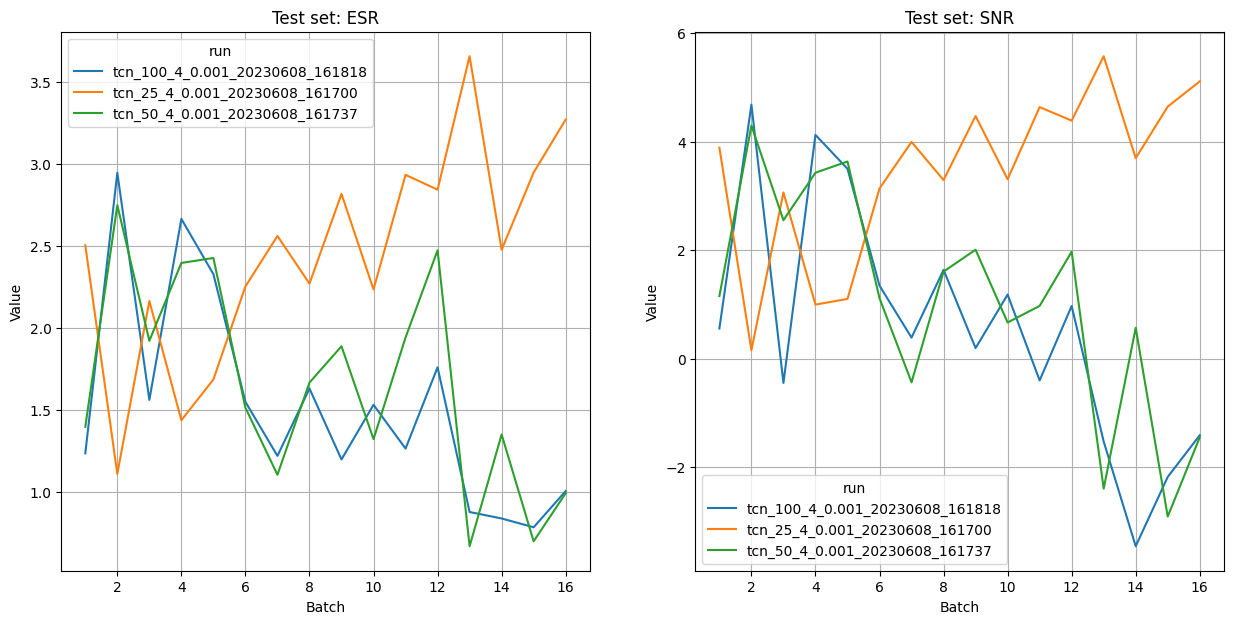

In [19]:
plt.figure(figsize=(15, 7))

# Training plot
plt.subplot(1, 2, 1)
sns.lineplot(data=df_dict['test/batch_esr'].reset_index(), x="step", y="value", hue='run').set_title("Test set: ESR")
# plt.ylim(0, 100)
# plt.xlim(0, 2000)
plt.grid(True)
plt.xlabel("Batch")
plt.ylabel("Value")
plt.xscale('linear')
plt.yscale('linear')

# Validation plot
plt.subplot(1, 2, 2)
sns.lineplot(data=df_dict['test/batch_snr'].reset_index(), x='step', y='value', hue='run').set_title("Test set: SNR")
# plt.ylim(0, 100)
# plt.xlim(0, 2000)
plt.grid(True)
plt.xlabel("Batch")
plt.ylabel("Value")
plt.xscale('linear')
plt.yscale('linear')

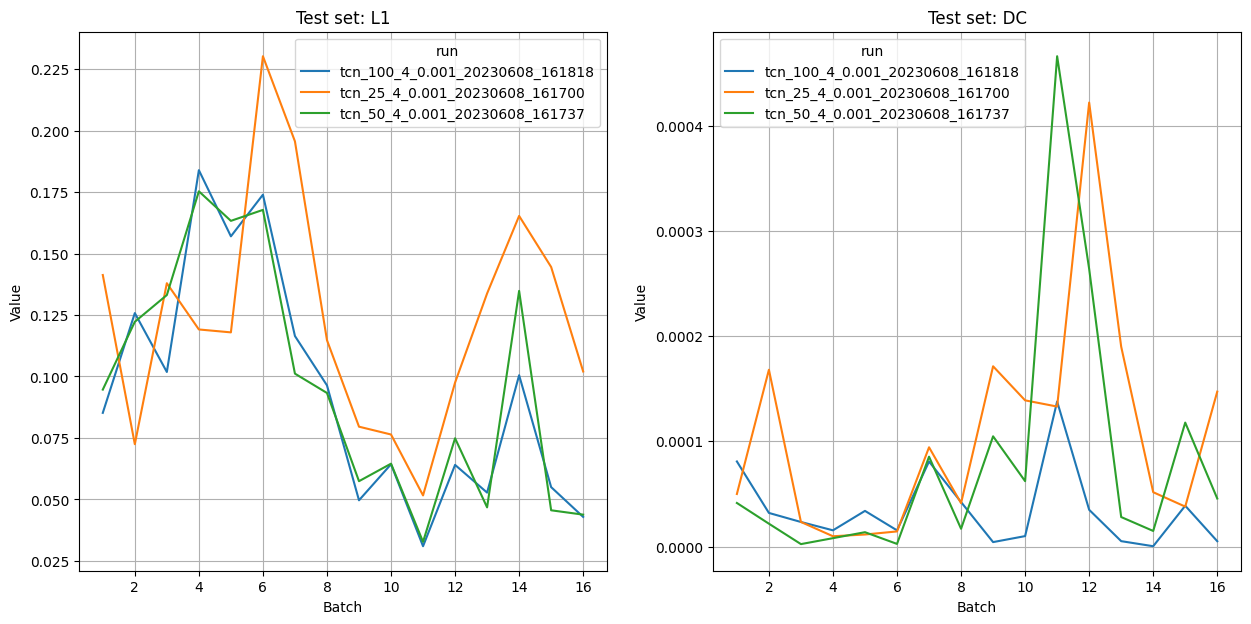

In [20]:
plt.figure(figsize=(15, 7))

# Training plot
plt.subplot(1, 2, 1)
sns.lineplot(data=df_dict['test/batch_l1'].reset_index(), x="step", y="value", hue='run').set_title("Test set: L1")
# plt.ylim(0, 100)
# plt.xlim(0, 2000)
plt.grid(True)
plt.xlabel("Batch")
plt.ylabel("Value")
plt.xscale('linear')
plt.yscale('linear')

# Validation plot
plt.subplot(1, 2, 2)
sns.lineplot(data=df_dict['test/batch_dc'].reset_index(), x='step', y='value', hue='run').set_title("Test set: DC")
# plt.ylim(0, 100)
# plt.xlim(0, 2000)
plt.grid(True)
plt.xlabel("Batch")
plt.ylabel("Value")
plt.xscale('linear')
plt.yscale('linear')

## Save to csv

In [21]:
# Save DataFrame to CSV
df.to_csv('01B_test.csv', index=False)
